In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../../")

#spectrome modules
from spectrome.utils import functions, path
from spectrome.brain import Brain
import scipy.stats as stats
from scipy.stats import friedmanchisquare


from spectrome.forward import ntf_local_stimulus as nt_stim
from spectrome.forward import ntf_local as nt_nostim
from spectrome.forward import ntf_local_stimulus as nt_stim

from scipy.io import loadmat
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import fdrcorrection

import pickle as pkl

In [2]:
##modeled data
x_mi_all={}
x_base_all={}
x_rest_all={}

for num in range(1, 5):
    x_mi_all[num]=np.zeros((68, 10, 19))
    x_base_all[num]=np.zeros((68, 10, 19))
    x_rest_all[num]=np.zeros((68, 10, 19))
    
    for i in range(19):
        mi_fname = f'../bci_results_apd/bci_results/eeg/sess{num}/mi_allsubs_f/mi_nostim_mse_db_fvec330_{i}.p'
        with open(mi_fname, 'rb') as f:
            x_mi_all[num][:,:,i]=np.array(pkl.load(f))

        base_fname = f'../bci_results_apd/bci_results/eeg/sess{num}/baseline_allsubs_f/baseline_nostim_mse_db_fvec330_{i}.p'
        with open(base_fname, 'rb') as f:
            x_base_all[num][:,:,i] = np.array(pkl.load(f))
        
        rest_fname = f'../bci_results_apd/bci_results/eeg/sess{num}/rs1_allsubs_f0/rs1_nostim_mse_db_fvec330_{i}.p'
        with open(rest_fname, 'rb') as f:
            x_rest_all[num][:,:,i]=np.array(pkl.load(f))


In [3]:
##all the sessions data of EEG
data1=loadmat("../../../Database_PWelch_AvgTrials_MI_Baseline_RS1_19Subjects_EEG_Sess1.mat")
fvec=np.squeeze(data1["Freqs"])[3:30]

In [4]:
scores=np.squeeze(loadmat("../../../Performance_Sess4.mat")['Performance_Sess4'])
df=pd.read_excel('../../../spectrome-bci/spectrome/ListROIs_DK.xlsx')

In [6]:
all_regions=[]
all_regions_idx=[]
for i,r in df.iterrows():
    all_regions_idx.append(i)
    all_regions.append(r['ROI'].strip("'"))

In [7]:
x_mi_all[4][:,:,:].shape

(68, 10, 19)

In [8]:
scores

array([89.3 , 38.1 , 86.1 , 63.9 , 88.9 , 56.7 , 70.  , 60.  , 66.1 ,
       63.3 , 53.9 , 77.2 , 69.17, 80.  , 61.1 , 71.  , 73.  , 68.33,
       56.67])

In [9]:
(x_mi_all[4][3,2,:]-x_rest_all[4][3,2,:])/x_rest_all[4][3,2,:]

array([ 0.04820916,  2.65499764, -0.57239886, -0.1844952 , -0.68110669,
       -0.09087515,  0.08186827,  0.01427024, -0.59530394,  0.04462838,
        0.13465479, -0.42807096,  2.67032068, -0.61516278, -0.04447211,
       -0.03489042,  0.06789063,  0.10372382, -0.02355522])

In [10]:
x_mi_all[4][:,5].shape

(68, 19)

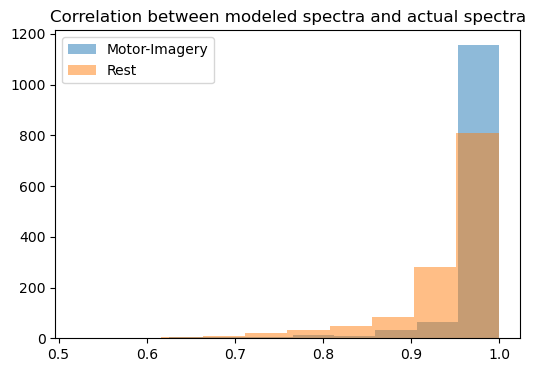

In [11]:
plt.figure(figsize=(6,4))
plt.title('Correlation between modeled spectra and actual spectra')
plt.hist(x_mi_all[4][:, 5].flatten(), label='Motor-Imagery', alpha=0.5)
plt.hist(x_rest_all[4][:, 5].flatten(),  label='Rest', alpha=0.5)
# plt.hist(x_mi_all[3][:, 5].flatten(), label='mi-3', alpha=0.5)
# plt.hist(x_mi_all[2][:, 5].flatten(), label='mi-2', alpha=0.5)
# plt.hist(x_mi_all[1][:, 5].flatten(), label='mi-1', alpha=0.5)
plt.legend()
plt.show()

In [14]:
x_mi_all[4][0,0,0]

0.19914179987372382

In [15]:
sess1_mi_rest_gei=[[] for _ in range(68)]

### (MI-Rest)/Rest

In [16]:
# ##gei--for first region
# sess1_mi_rest_gei=[]
# sess2_mi_rest_gei=[]
# sess3_mi_rest_gei=[]
# sess4_mi_rest_gei=[]

# ##gii
# sess1_mi_rest_gii=[]
# sess2_mi_rest_gii=[]
# sess3_mi_rest_gii=[]
# sess4_mi_rest_gii=[]

# ##tau_e
# sess1_mi_rest_tau_e=[]
# sess2_mi_rest_tau_e=[]
# sess3_mi_rest_tau_e=[]
# sess4_mi_rest_tau_e=[]

# ##tau_i
# sess1_mi_rest_tau_i=[]
# sess2_mi_rest_tau_i=[]
# sess3_mi_rest_tau_i=[]
# sess4_mi_rest_tau_i=[]


# for j in range(19):
#     mi_rest1_gei=(abs(x_mi_all[1][0,0,j])-abs(x_rest_all[1][0,0,j]))/abs(x_rest_all[1][0,0,j])
#     sess1_mi_rest_gei.append(mi_rest1_gei)
#     mi_rest2_gei=(abs(x_mi_all[2][0,0,j])-abs(x_rest_all[2][0,0,j]))/abs(x_rest_all[2][0,0,j])
#     sess2_mi_rest_gei.append(mi_rest2_gei)
#     mi_rest3_gei=(abs(x_mi_all[3][0,0,j])-abs(x_rest_all[3][0,0,j]))/abs(x_rest_all[3][0,0,j])
#     sess3_mi_rest_gei.append(mi_rest3_gei)
#     mi_rest4_gei=(abs(x_mi_all[4][0,0,j])-abs(x_rest_all[4][0,0,j]))/abs(x_rest_all[4][0,0,j])
#     sess4_mi_rest_gei.append(mi_rest4_gei)



In [17]:
# sess1_mi_rest_gei

In [18]:
# plt.figure(figsize=(6,4))
# plt.hist(sess1_mi_rest_gei, label='1')
# plt.hist(sess2_mi_rest_gei, label='2')
# plt.hist(sess3_mi_rest_gei, label='3')
# plt.hist(sess4_mi_rest_gei, label='4')
# plt.legend()
# plt.show()

In [19]:
x_mi_all[1].shape

(68, 10, 19)

### analyzing gei

In [12]:
##gei
sess1_mi_rest_gei=[[] for _ in range(68)]
sess2_mi_rest_gei=[[] for _ in range(68)]
sess3_mi_rest_gei=[[] for _ in range(68)]
sess4_mi_rest_gei=[[] for _ in range(68)]

 
for k in range(68):
  for J in range(19):
        mi_rest1_gei=((x_mi_all[1][k,0,J])-(x_rest_all[1][k,0,J]))/(x_rest_all[1][k,0,J])
        sess1_mi_rest_gei[k].append(mi_rest1_gei)

        mi_rest2_gei=((x_mi_all[2][k,0,J])-(x_rest_all[2][k,0,J]))/(x_rest_all[2][k,0,J])
        sess2_mi_rest_gei[k].append(mi_rest2_gei)

        mi_rest3_gei=((x_mi_all[3][k,0,J])-(x_rest_all[3][k,0,J]))/(x_rest_all[3][k,0,J])
        sess3_mi_rest_gei[k].append(mi_rest3_gei)
        
        mi_rest4_gei=((x_mi_all[4][k,0,J])-(x_rest_all[4][k,0,J]))/(x_rest_all[4][k,0,J])
        sess4_mi_rest_gei[k].append(mi_rest4_gei)


In [13]:
print("Incase of gei, significant regions are---")
for i in range(68):
    result = stats.kruskal(sess1_mi_rest_gei[i], sess2_mi_rest_gei[i], sess3_mi_rest_gei[i], sess4_mi_rest_gei[i])
    # print(result[1])
    if result[1]<=0.05:
        for j, reg in enumerate(all_regions):
            if i==j:
                print(f"index {i}, {all_regions[j]}, {result}")

Incase of gei, significant regions are---


In [14]:
print("Incase of gei, significant regions are---")
for i in range(68):
    result = friedmanchisquare(sess1_mi_rest_gei[i], sess2_mi_rest_gei[i], sess3_mi_rest_gei[i], sess4_mi_rest_gei[i])
    if result[1]<=0.05:
        for j, reg in enumerate(all_regions):
            if i==j:
                print(f"index {i}, {all_regions[j]}, {result}")


Incase of gei, significant regions are---
index 23, lateraloccipital R, FriedmanchisquareResult(statistic=8.67741935483873, pvalue=0.03390193313598619)
index 35, parahippocampal R, FriedmanchisquareResult(statistic=7.971428571428597, pvalue=0.046605896308867176)
index 48, precentral L, FriedmanchisquareResult(statistic=8.294117647058837, pvalue=0.04030862455217)


In [15]:
p_values = []

for i in range(68):
    result =  friedmanchisquare(sess1_mi_rest_gei[i], sess2_mi_rest_gei[i], sess3_mi_rest_gei[i], sess4_mi_rest_gei[i])
    p_values.append(result[1])

fdr_corrected_pvals = fdrcorrection(p_values)[1]
fdr_corr = fdr_corrected_pvals.tolist()

for i in range(len(fdr_corr)):
    if fdr_corr[i] <0.1:
        print(f"index {i}, {all_regions[i]}, {fdr_corr[i]}")

In [16]:
fdr_corrected_pvals

array([0.97442689, 0.97442689, 0.97442689, 0.97442689, 0.74113152,
       0.77384599, 0.97442689, 0.74113152, 0.97442689, 0.97442689,
       0.97442689, 0.97442689, 0.97442689, 0.97442689, 0.97442689,
       0.97442689, 0.97442689, 0.97442689, 0.97442689, 0.97442689,
       0.97442689, 0.97442689, 0.97442689, 0.73521194, 0.97442689,
       0.97442689, 0.97442689, 0.97442689, 0.99246146, 0.97442689,
       0.97442689, 0.74113152, 0.97442689, 0.74113152, 0.97442689,
       0.73521194, 0.74113152, 0.97442689, 0.97442689, 0.97442689,
       0.97442689, 0.97442689, 0.97442689, 0.73521194, 0.97442689,
       0.97442689, 0.97442689, 0.97442689, 0.73521194, 0.97442689,
       0.97442689, 0.97442689, 0.97442689, 0.99246146, 0.73521194,
       0.97442689, 0.73521194, 0.74113152, 0.97442689, 0.97442689,
       0.97442689, 0.97442689, 0.97442689, 0.97442689, 0.97442689,
       0.97442689, 0.97442689, 0.97442689])

### Analysis of gii

In [17]:
##gii
sess1_mi_rest_gii=[[] for _ in range(68)]
sess2_mi_rest_gii=[[] for _ in range(68)]
sess3_mi_rest_gii=[[] for _ in range(68)]
sess4_mi_rest_gii=[[] for _ in range(68)]

 
for k in range(68):
    for J in range(19):
        mi_rest1_gii=((x_mi_all[1][k,1,J])-(x_rest_all[1][k,1,J]))/(x_rest_all[1][k,1,J])
        sess1_mi_rest_gii[k].append(mi_rest1_gii)
        mi_rest2_gii=((x_mi_all[2][k,1,J])-(x_rest_all[2][k,1,J]))/(x_rest_all[2][k,1,J])
        sess2_mi_rest_gii[k].append(mi_rest2_gii)
        mi_rest3_gii=((x_mi_all[3][k,1,J])-(x_rest_all[3][k,1,J]))/(x_rest_all[3][k,1,J])
        sess3_mi_rest_gii[k].append(mi_rest3_gii)
        mi_rest4_gii=((x_mi_all[4][k,1,J])-(x_rest_all[4][k,1,J]))/(x_rest_all[4][k,1,J])
        sess4_mi_rest_gii[k].append(mi_rest4_gii)


In [18]:
print("Incase of gii, significant regions are---")
for i in range(68):
    result = stats.kruskal(sess1_mi_rest_gii[i], sess2_mi_rest_gii[i], sess3_mi_rest_gii[i], sess4_mi_rest_gii[i])
    if result[1]<=0.05:
        for j, reg in enumerate(all_regions):
            if i==j:
                print(f"index {i}, {all_regions[j]}, {result}")


Incase of gii, significant regions are---
index 4, caudalmiddlefrontal L, KruskalResult(statistic=8.853489847989692, pvalue=0.03130359301457407)


In [19]:
for i in range(68):
    result = friedmanchisquare(sess1_mi_rest_gii[i], sess2_mi_rest_gii[i], sess3_mi_rest_gii[i], sess4_mi_rest_gii[i])
    # print(result[1])
    if result[1]<=0.05:
        for j, reg in enumerate(all_regions):
            if i==j:
                print(f"index {i}, {all_regions[j]}, {result}")

In [20]:
p_values = []

for i in range(68):
    result = friedmanchisquare(sess1_mi_rest_gii[i], sess2_mi_rest_gii[i], sess3_mi_rest_gii[i], sess4_mi_rest_gii[i])
    p_values.append(result[1])

fdr_corrected_pvals = fdrcorrection(p_values)[1]
fdr_corr = fdr_corrected_pvals.tolist()

for i in range(len(fdr_corr)):
    if fdr_corr[i] < 0.1:
        print(f"index {i}, {all_regions[i]}, {fdr_corr[i]}")

In [21]:
fdr_corrected_pvals

array([0.92359512, 0.95135473, 0.92359512, 0.92359512, 0.92359512,
       0.92359512, 0.92359512, 0.92359512, 0.92359512, 0.92359512,
       0.92359512, 0.96057916, 0.92359512, 0.95511655, 0.92359512,
       0.92359512, 0.92359512, 0.9313595 , 0.96128261, 0.99847392,
       0.92359512, 0.99847392, 0.92359512, 0.92359512, 0.95511655,
       0.99847392, 0.92359512, 0.99477395, 0.92359512, 0.96128261,
       0.92359512, 0.92359512, 0.95511655, 0.92359512, 0.92359512,
       0.92359512, 0.96128261, 0.99267152, 0.92359512, 0.95135473,
       0.92359512, 0.92359512, 0.95135473, 0.92359512, 0.96128261,
       0.96057916, 0.92359512, 0.92359512, 0.92359512, 0.95511655,
       0.92359512, 0.92359512, 0.98300577, 0.95135473, 0.95511655,
       0.95135473, 0.92359512, 0.96128261, 0.92359512, 0.92359512,
       0.98300577, 0.92359512, 0.96057916, 0.92359512, 0.92359512,
       0.96057916, 0.95511655, 0.92359512])

### Analysis of tau_e

In [22]:
##tau_e
sess1_mi_rest_tau_e=[[] for _ in range(68)]
sess2_mi_rest_tau_e=[[] for _ in range(68)]
sess3_mi_rest_tau_e=[[] for _ in range(68)]
sess4_mi_rest_tau_e=[[] for _ in range(68)]

for k in range(68):
    for J in range(19):
        mi_rest1_tau_e=((x_mi_all[1][k,2,J])-(x_rest_all[1][k,2,J]))/(x_rest_all[1][k,2,J])
        sess1_mi_rest_tau_e[k].append(mi_rest1_tau_e)
        mi_rest2_tau_e=((x_mi_all[2][k,2,J])-(x_rest_all[2][k,2,J]))/(x_rest_all[2][k,2,J])
        sess2_mi_rest_tau_e[k].append(mi_rest2_tau_e)
        mi_rest3_tau_e=((x_mi_all[3][k,2,J])-(x_rest_all[3][k,2,J]))/(x_rest_all[3][k,2,J])
        sess3_mi_rest_tau_e[k].append(mi_rest3_tau_e)
        mi_rest4_tau_e=((x_mi_all[4][k,2,J])-(x_rest_all[4][k,2,J]))/(x_rest_all[4][k,2,J])
        sess4_mi_rest_tau_e[k].append(mi_rest4_tau_e)

In [23]:
sess1_mi_rest_tau_e[67]

[-0.1528324710139124,
 0.0,
 -0.7096627599974819,
 -0.1858217319089282,
 2.172911284248204,
 -0.17069089417914343,
 0.0,
 0.3136878600376268,
 -0.19125460796232557,
 0.08981980924768831,
 -0.5901956263057359,
 1.302737948109798,
 -0.799466739787268,
 -0.40001451235722657,
 0.0,
 0.0,
 0.25410630059082673,
 -0.1278453906467742,
 -0.07735838621646944]

In [24]:
for i in range(68):
    result = stats.kruskal(sess1_mi_rest_tau_e[i], sess2_mi_rest_tau_e[i], sess3_mi_rest_tau_e[i], sess4_mi_rest_tau_e[i])
    if result[1]<=0.05:
        for j, reg in enumerate(all_regions):
            if i==j:
                print(f"index {i}, {all_regions[j]}, {result}")


In [25]:
print("Incase of tau_e, significant regions are---")
for i in range(68):
    result = friedmanchisquare(sess1_mi_rest_tau_e[i], sess2_mi_rest_tau_e[i], sess3_mi_rest_tau_e[i], sess4_mi_rest_tau_e[i])
    if result[1]<=0.05:
        for j, reg in enumerate(all_regions):
            if i==j:
                print(f"index {i}, {all_regions[j]}, {result}")

Incase of tau_e, significant regions are---
index 1, bankssts R, FriedmanchisquareResult(statistic=9.0, pvalue=0.02929088653488826)
index 2, caudalanteriorcingulate L, FriedmanchisquareResult(statistic=10.89473684210526, pvalue=0.012308905748379492)
index 3, caudalanteriorcingulate R, FriedmanchisquareResult(statistic=16.19999999999999, pvalue=0.0010317868098302402)
index 5, caudalmiddlefrontal R, FriedmanchisquareResult(statistic=8.714285714285708, pvalue=0.03334098763439356)
index 22, lateraloccipital L, FriedmanchisquareResult(statistic=7.930851063829792, pvalue=0.047462633287195626)


In [26]:
p_values = []

for i in range(68):
    result = friedmanchisquare(sess1_mi_rest_tau_e[i], sess2_mi_rest_tau_e[i], sess3_mi_rest_tau_e[i], sess4_mi_rest_tau_e[i])
    p_values.append(result[1])

fdr_corrected_pvals = fdrcorrection(p_values)[1]
fdr_corr = fdr_corrected_pvals.tolist()

for i in range(len(fdr_corr)):
    if fdr_corr[i] < 0.1:
        print(f"index {i}, {all_regions[i]}, {fdr_corr[i]}")

index 3, caudalanteriorcingulate R, 0.07016150306845634


In [27]:
fdr_corrected_pvals

array([0.96297018, 0.56679679, 0.4185028 , 0.0701615 , 0.96297018,
       0.56679679, 0.96297018, 0.96297018, 0.96297018, 0.96297018,
       0.96297018, 0.92877122, 0.96297018, 0.96297018, 0.96297018,
       0.96297018, 0.96297018, 0.96297018, 0.96297018, 0.96297018,
       0.96297018, 0.96297018, 0.63141189, 0.96297018, 0.96297018,
       0.96297018, 0.96297018, 0.96297018, 0.96297018, 0.96297018,
       0.96297018, 0.96297018, 0.96297018, 0.96297018, 0.96297018,
       0.96297018, 0.96297018, 0.96297018, 0.96297018, 0.96297018,
       0.96297018, 0.96297018, 0.96297018, 0.96297018, 0.96297018,
       0.96297018, 0.96297018, 0.96297018, 0.96297018, 0.92877122,
       0.96297018, 0.96297018, 0.96297018, 0.96297018, 0.96297018,
       0.96297018, 0.63141189, 0.96297018, 0.96297018, 0.96297018,
       0.96297018, 0.96297018, 0.96297018, 0.96297018, 0.96297018,
       0.96297018, 0.96297018, 0.96297018])

### Analysis of tau_i

In [28]:
##tau_i
sess1_mi_rest_tau_i=[[] for _ in range(68)]
sess2_mi_rest_tau_i=[[] for _ in range(68)]
sess3_mi_rest_tau_i=[[] for _ in range(68)]
sess4_mi_rest_tau_i=[[] for _ in range(68)]

 

for k in range(68):
   for J in range(19):
        mi_rest1_tau_i=(abs(x_mi_all[1][k,3,J])-abs(x_rest_all[1][k,3,J]))/abs(x_rest_all[1][k,3,J])
        sess1_mi_rest_tau_i[k].append(mi_rest1_tau_i)
        
        mi_rest2_tau_i=(abs(x_mi_all[2][k,3,J])-abs(x_rest_all[2][k,3,J]))/abs(x_rest_all[2][k,3,J])
        sess2_mi_rest_tau_i[k].append(mi_rest2_tau_i)
        mi_rest3_tau_i=(abs(x_mi_all[3][k,3,J])-abs(x_rest_all[3][k,3,J]))/abs(x_rest_all[3][k,3,J])
        sess3_mi_rest_tau_i[k].append(mi_rest3_tau_i)
        mi_rest4_tau_i=(abs(x_mi_all[4][k,3,J])-abs(x_rest_all[4][k,3,J]))/abs(x_rest_all[4][k,3,J])
        sess4_mi_rest_tau_i[k].append(mi_rest4_tau_i)

In [29]:
print("Incase of tau_i, significant regions are---")
for i in range(68):
    result = stats.kruskal(sess1_mi_rest_tau_i[i], sess2_mi_rest_tau_i[i], sess3_mi_rest_tau_i[i], sess4_mi_rest_tau_i[i])
    if result[1]<=0.05:
        for j, reg in enumerate(all_regions):
            if i==j:
                print(f"index {i}, {all_regions[j]}, {result}")

Incase of tau_i, significant regions are---


In [30]:
print("Incase of tau_i, significant regions are---")
for i in range(68):
    result = friedmanchisquare(sess1_mi_rest_tau_i[i], sess2_mi_rest_tau_i[i], sess3_mi_rest_tau_i[i], sess4_mi_rest_tau_i[i])
    if result[1]<=0.05:
        for j, reg in enumerate(all_regions):
            if i==j:
                print(f"index {i}, {all_regions[j]}, {result}")

Incase of tau_i, significant regions are---
index 2, caudalanteriorcingulate L, FriedmanchisquareResult(statistic=8.259493670886053, pvalue=0.04094240218193096)


In [31]:
p_values = []

for i in range(68):
    result = friedmanchisquare(sess1_mi_rest_tau_i[i], sess2_mi_rest_tau_i[i], sess3_mi_rest_tau_i[i], sess4_mi_rest_tau_i[i])
    p_values.append(result[1])

fdr_corrected_pvals = fdrcorrection(p_values)[1]
fdr_corr = fdr_corrected_pvals.tolist()

for i in range(len(fdr_corr)):
    if fdr_corr[i] < 0.1:
        print(f"index {i}, {all_regions[i]}, {fdr_corr[i]}")

In [32]:
fdr_corrected_pvals

array([0.9971417, 0.9971417, 0.9971417, 0.9971417, 0.9971417, 0.9971417,
       0.9971417, 0.9971417, 0.9971417, 0.9971417, 0.9971417, 0.9971417,
       0.9971417, 0.9971417, 0.9971417, 0.9971417, 0.9971417, 0.9971417,
       0.9971417, 0.9971417, 0.9971417, 0.9971417, 0.9971417, 0.9971417,
       0.9971417, 0.9971417, 0.9971417, 0.9971417, 0.9971417, 0.9971417,
       0.9971417, 0.9971417, 0.9971417, 0.9971417, 0.9971417, 0.9971417,
       0.9971417, 0.9971417, 0.9971417, 0.9971417, 0.9971417, 0.9971417,
       0.9971417, 0.9971417, 0.9971417, 0.9971417, 0.9971417, 0.9971417,
       0.9971417, 0.9971417, 0.9971417, 0.9971417, 0.9971417, 0.9971417,
       0.9971417, 0.9971417, 0.9971417, 0.9971417, 0.9971417, 0.9971417,
       0.9971417, 0.9971417, 0.9971417, 0.9971417, 0.9971417, 0.9971417,
       0.9971417, 0.9971417])

### Intra subject variability analysis over time, session after session

In [33]:
gii_region_codition_effect=['cuneus L', 'cuneus R', 'isthmuscingulate L', 'lingual L', 'parahippocampal R']
gii_len=len(gii_region_codition_effect)
gii_len

5

In [34]:
gii_reg_idx=[]
for reg in gii_region_codition_effect:
    gii_reg_idx.append(all_regions.index(reg))

print(gii_reg_idx)

[6, 7, 20, 26, 35]


In [35]:
gii_reg_idx[0]

6

In [ ]:
# ##gii
# sess1_mi_rest_gii=[[] for _ in range(19)]
# sess2_mi_rest_gii=[[] for _ in range(19)]
# sess3_mi_rest_gii=[[] for _ in range(19)]
# sess4_mi_rest_gii=[[] for _ in range(19)]


# for j in range(19):
#     for k in range(len(gii_reg_idx)):
#         mi_rest1_gii=((x_mi_all[1][gii_reg_idx[k],1,j])-(x_rest_all[1][gii_reg_idx[k],1,j]))/(x_rest_all[1][gii_reg_idx[k],1,j])
#         sess1_mi_rest_gii[j].append(mi_rest1_gii)

        
#         mi_rest2_gii=((x_mi_all[2][gii_reg_idx[k],1,j])-(x_rest_all[2][gii_reg_idx[k],1,j]))/(x_rest_all[2][gii_reg_idx[k],1,j])
#         sess2_mi_rest_gii[j].append(mi_rest2_gii)

#         mi_rest3_gii=((x_mi_all[3][gii_reg_idx[k],1,j])-(x_rest_all[3][gii_reg_idx[k],1,j]))/(x_rest_all[3][gii_reg_idx[k],1,j])
#         sess3_mi_rest_gii[j].append(mi_rest3_gii)

#         mi_rest4_gii=((x_mi_all[4][gii_reg_idx[k],1,j])-(x_rest_all[4][gii_reg_idx[k],1,j]))/(x_rest_all[4][gii_reg_idx[k],1,j])
#         sess4_mi_rest_gii[j].append(mi_rest4_gii)


In [36]:
##gii
sess1_mi_rest_gii=[[] for _ in range(19)]
sess2_mi_rest_gii=[[] for _ in range(19)]
sess3_mi_rest_gii=[[] for _ in range(19)]
sess4_mi_rest_gii=[[] for _ in range(19)]


for j in range(19):
    for k in range(len(gii_reg_idx)):
        mi_rest1_gii=((x_mi_all[1][gii_reg_idx[k],1,j]))
        sess1_mi_rest_gii[j].append(mi_rest1_gii)

        
        mi_rest2_gii=((x_mi_all[2][gii_reg_idx[k],1,j]))
        sess2_mi_rest_gii[j].append(mi_rest2_gii)

        mi_rest3_gii=((x_mi_all[3][gii_reg_idx[k],1,j]))
        sess3_mi_rest_gii[j].append(mi_rest3_gii)

        mi_rest4_gii=((x_mi_all[4][gii_reg_idx[k],1,j]))
        sess4_mi_rest_gii[j].append(mi_rest4_gii)


In [37]:
x_mi_all[1][:,:,:].shape

(68, 10, 19)

In [38]:
sess1_mi_rest_gii[0]

[0.3410865315337904,
 1.8983580862433764,
 0.8937543521536958,
 1.9,
 0.32497964950911107]

In [39]:
pvalues=[]
for i in range(19):
   pval= friedmanchisquare(sess1_mi_rest_gii[i], sess2_mi_rest_gii[i], sess3_mi_rest_gii[i], sess4_mi_rest_gii[i])[1]
   pvalues.append(pval)

In [40]:
pvalues, scores

([0.0078057407518306934,
  0.025557028107225127,
  0.06939114413465479,
  0.04519221940437146,
  0.14939009423846003,
  0.7243894461724858,
  0.39162517627108906,
  0.013716579257289866,
  0.47529108334302206,
  0.12481346246182602,
  0.47168747629307395,
  0.6684931675206047,
  0.24066188520961498,
  0.12089642353543009,
  0.761827607910522,
  0.3233653327485529,
  0.6684931675206047,
  0.20654629379644526,
  0.7592675978639395],
 array([89.3 , 38.1 , 86.1 , 63.9 , 88.9 , 56.7 , 70.  , 60.  , 66.1 ,
        63.3 , 53.9 , 77.2 , 69.17, 80.  , 61.1 , 71.  , 73.  , 68.33,
        56.67]))

In [41]:
pfdr=fdrcorrection(pvalues)[1]
for idx, val in enumerate(pfdr):
    if val < 0.05:
        print(f"FDR corrected p-value: {val}, {idx}")

## g_ei

In [42]:
gei_region_codition_effect = ['cuneus L', 'cuneus R', 'inferiorparietal L', 'lateraloccipital L', 'precentral L']
gei_len=len(gei_region_codition_effect)
gei_len

5

In [43]:
gei_reg_idx=[]
for reg in gei_region_codition_effect:
    gei_reg_idx.append(all_regions.index(reg))

print(gei_reg_idx)

[6, 7, 14, 22, 48]


In [44]:
##gei
sess1_mi_rest_gei=[[] for _ in range(19)]
sess2_mi_rest_gei=[[] for _ in range(19)]
sess3_mi_rest_gei=[[] for _ in range(19)]
sess4_mi_rest_gei=[[] for _ in range(19)]


for j in range(19):
    for k in range(len(gei_reg_idx)):
        mi_rest1_gei=((x_mi_all[1][gei_reg_idx[k],1,j]))
        sess1_mi_rest_gei[j].append(mi_rest1_gei)
        
        mi_rest2_gei=((x_mi_all[2][gei_reg_idx[k],1,j]))
        sess2_mi_rest_gei[j].append(mi_rest2_gei)

        mi_rest3_gei=((x_mi_all[3][gei_reg_idx[k],1,j]))
        sess3_mi_rest_gei[j].append(mi_rest3_gei)

        mi_rest4_gei=((x_mi_all[4][gei_reg_idx[k],1,j]))
        sess4_mi_rest_gei[j].append(mi_rest4_gei)


In [45]:
pvalues_gei=[]
for i in range(19):
   pval= friedmanchisquare(sess1_mi_rest_gei[i], sess2_mi_rest_gei[i], sess3_mi_rest_gei[i], sess4_mi_rest_gei[i])[1]
   pvalues_gei.append(pval)

In [46]:
pfdr=fdrcorrection(pvalues_gei)[1]
for idx, val in enumerate(pfdr):
    if val < 0.05:
        print(f"FDR corrected p-value: {val}, {idx}")